In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud,STOPWORDS
from sklearn.metrics import accuracy_score
from nltk.stem import PorterStemmer

In [36]:
#importing data
d=pd.read_csv('D:/analytics/practice/spam.csv',encoding='latin-1')

In [3]:
d.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [37]:
#Removing unwanted columns
d.drop(d.columns[2:],axis=1,inplace=True)

#renaming the column names
d=d.rename(columns={'v1':'Type','v2':'Text'})

In [38]:
#converting datatype of column Type to numeric
d['Type']=d['Type'].replace('ham',0)
d['Type']=d['Type'].replace('spam',1)

In [39]:
d.head(10)

,Type,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


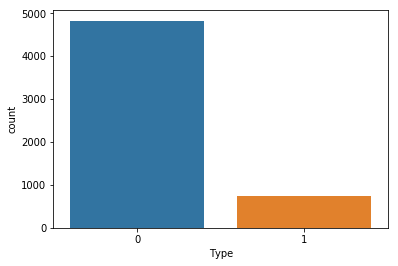

In [124]:
#Checking the number of spam and non spam messages
sns.countplot(d['Type'])

# Text Mining

In [40]:
#We'll write a clean function to remove stopwords,punctuations,numbers and convert characters to lower case from texts
def clean(x):
    swr=' '.join(i for i in x.lower().split() if i not in stopwords.words('english')) #converting to lower case & removing stopwords
    pr=''.join(i for i in swr if i not in string.punctuation)   #removing punctuation marks
    nr=''.join(i for i in pr if not i.isdigit())                #removing numbers
    return nr

In [41]:
#Cleaning all the texts and joining the cleaned texts to the same data frame
cd=[clean(i) for i in d['Text']]
d['cd']=cd

In [42]:
d.head()

,Type,Text,cd
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st...
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though


# Wordcloud

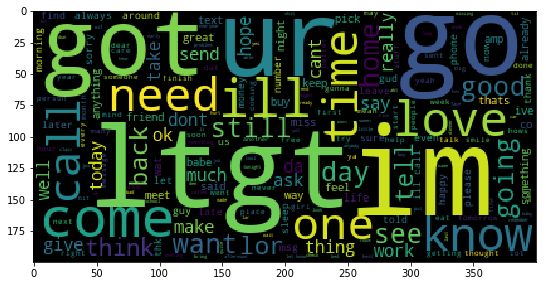

In [43]:
#Plotting wordcloud to find out most frequent words in spam messages
wc=WordCloud(stopwords=STOPWORDS).generate(''.join(d.loc[d['Type']==0,'cd']))
plt.figure(figsize=(9,6))
plt.imshow(wc)

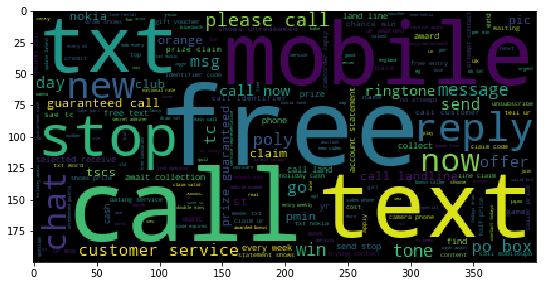

In [44]:
#Plotting wordcloud to find out most frequent words in spam messages
wc=WordCloud(stopwords=STOPWORDS).generate(''.join(d.loc[d['Type']==1,'cd']))
plt.figure(figsize=(9,6))
plt.imshow(wc)

In [45]:
#Some words like will,now are still in the document. Will remove these words as well.
for i in range(len(d)):
    swr=' '.join(i for i in d.iloc[i,2].lower().split() if i not in [stopwords.words('english'),'ill','im','ur','go'])
    d.iloc[i,2]=swr

# Term document matrix

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect=TfidfVectorizer(stop_words='english')
tdm=vect.fit_transform(d['cd'])

In [47]:
#Converting term document matrix into a dataframe
tdd=pd.DataFrame(tdm.toarray(),columns=vect.get_feature_names())

In [48]:
#Joining Type variable to the new dataframe
tdd=tdd.join(d['Type'])

# Modeling

In [103]:
#Dividing data to train and test
from sklearn.cross_validation import train_test_split
test,train=train_test_split(tdd,test_size=0.8)

In [85]:
test.shape

(1114, 8282)

# Naive Bayes

In [105]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB(alpha=0.7).fit(train.iloc[:,:8281],train.iloc[:,8281])

#predicting values
nbp=nb.predict(test.iloc[:,:8281])

#Building confusion matrix
cm=pd.crosstab(test['Type'],nbp)
tn=cm[0][0]
fn=cm[0][1]
tp=cm[1][1]
fp=cm[1][0]
cm

col_0,0,1
Type,,
0,974,0
1,24,116


In [106]:
#Calculating different error metrics
print('Accuracy: ',accuracy_score(test['Type'],nbp)*100)
print('False Positive Rate: ',(fp/(fp+tn))*100)
print('False Negative Rate: ',(fn/(fn+tp))*100)

Accuracy:  97.84560143626571
False Positive Rate:  0.0
False Negative Rate:  17.142857142857142


# Support Vector Machine

In [107]:
from sklearn.svm import SVC
sv=SVC(kernel='linear',C=0.5).fit(train.iloc[:,:8281],train.iloc[:,8281])

#predicting values
svp=sv.predict(test.iloc[:,:8281])

#Building confusion matrix
cm=pd.crosstab(test['Type'],svp)
tn=cm[0][0]
fn=cm[0][1]
tp=cm[1][1]
fp=cm[1][0]
cm

col_0,0,1
Type,,
0,970,4
1,28,112


In [108]:
#Calculating different error metrics
print('Accuracy: ',accuracy_score(test['Type'],svp)*100)
print('False Positive Rate: ',(fp/(fp+tn))*100)
print('False Negative Rate: ',(fn/(fn+tp))*100)

Accuracy:  97.12746858168761
False Positive Rate:  0.41067761806981523
False Negative Rate:  20.0


# Random Forest

In [93]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=110).fit(train.iloc[:,:8281],train.iloc[:,8281])

#predicting values
rfp=rf.predict(test.iloc[:,:8281])

#Building confusion matrix
cm=pd.crosstab(test['Type'],rfp)
tn=cm[0][0]
fn=cm[0][1]
tp=cm[1][1]
fp=cm[1][0]
cm

col_0,0,1
Type,,
0,962,0
1,28,124


In [94]:
#Calculating different error metrics
print('Accuracy: ',accuracy_score(test['Type'],rfp)*100)
print('False Positive Rate: ',(fp/(fp+tn))*100)
print('False Negative Rate: ',(fn/(fn+tp))*100)

Accuracy:  97.48653500897666
False Positive Rate:  0.0
False Negative Rate:  18.421052631578945


# Gradient Boosting

In [125]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(n_estimators=150,max_depth=7,learning_rate=0.1).fit(train.iloc[:,:8281],train.iloc[:,8281])

#predicting values
gbp=gb.predict(test.iloc[:,:8281])

#Building confusion matrix
cm=pd.crosstab(test['Type'],gbp)
tn=cm[0][0]
fn=cm[0][1]
tp=cm[1][1]
fp=cm[1][0]
cm

col_0,0,1
Type,,
0,954,8
1,32,120


In [126]:
#Calculating different error metrics
print('Accuracy: ',accuracy_score(test['Type'],gbp)*100)
print('False Positive Rate: ',(fp/(fp+tn))*100)
print('False Negative Rate: ',(fn/(fn+tp))*100)

Accuracy:  96.40933572710951
False Positive Rate:  0.8316008316008316
False Negative Rate:  21.052631578947366


# Logistic Regression

In [122]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=10).fit(train.iloc[:,:8281],train.iloc[:,8281])

#predicting values
lrp=lr.predict(test.iloc[:,:8281])

#Building confusion matrix
cm=pd.crosstab(test['Type'],lrp)
tn=cm[0][0]
fn=cm[0][1]
tp=cm[1][1]
fp=cm[1][0]
cm

col_0,0,1
Type,,
0,960,2
1,27,125


In [123]:
#Calculating different error metrics
print('Accuracy: ',accuracy_score(test['Type'],lrp)*100)
print('False Positive Rate: ',(fp/(fp+tn))*100)
print('False Negative Rate: ',(fn/(fn+tp))*100)

Accuracy:  97.3967684021544
False Positive Rate:  0.2079002079002079
False Negative Rate:  17.763157894736842


From the above models, we can conclude that a well tuned Naive Bayes model will have a better performance than all other models.